In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read the csv's

df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

# concate both frames
df_main = pd.concat( [df_train,df_test], axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
#Fill the nulls with grouped medians

df_main.Age.fillna(df_main.groupby(['Sex','Pclass']).transform('median').Age.iloc[:df_main.shape[0]], inplace=True)
df_main.Fare.fillna(df_main.groupby(['Sex','Pclass']).transform('median').Fare.iloc[:df_main.shape[0]], inplace=True)

df_main.drop(["Cabin"], axis=1, inplace=True)

df_main.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [63]:
'''
Check for the title in name and extract that
Step 1 => extract the titles in new field
'''

In [92]:
main = df_main
main["Title"] = [name.split(",")[1].split(" ")[1] for name in main.Name]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Teen,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,Mr.


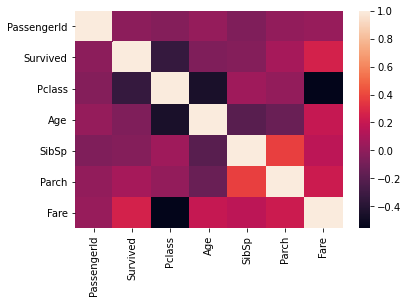

In [5]:
sns.heatmap(df_main.corr())
plt.show()

In [64]:
bins = [0,10,25,40,60,100]
labels = ['Kid','Teen','Adult','Grandparents','SuperOld']
df_main['AgeGroup'] = pd.cut(df_main['Age'], bins=bins, labels=labels,right=False)


In [79]:

'''
    Splitt the train and test dataset again.
'''

train_df = df_main.iloc[0:890]
test_df = df_main.iloc[891:]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  890 non-null    int64   
 1   Survived     890 non-null    float64 
 2   Pclass       890 non-null    int64   
 3   Name         890 non-null    object  
 4   Sex          890 non-null    object  
 5   Age          890 non-null    float64 
 6   SibSp        890 non-null    int64   
 7   Parch        890 non-null    int64   
 8   Ticket       890 non-null    object  
 9   Fare         890 non-null    float64 
 10  Embarked     888 non-null    object  
 11  AgeGroup     890 non-null    category
dtypes: category(1), float64(3), int64(4), object(4)
memory usage: 84.5+ KB


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     0 non-null      float64 
 2   Pclass       418 non-null    int64   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    object  
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    object  
 11  AgeGroup     418 non-null    category
dtypes: category(1), float64(3), int64(4), object(4)
memory usage: 39.8+ KB


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train = pd.get_dummies(train_df[["AgeGroup","Pclass","Fare","Sex"]])
y_train = train_df["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=21)



In [82]:
rfc_model = RandomForestClassifier(n_estimators=30, criterion="entropy", random_state=42)
rfc_model.fit(X_train,Y_train)
y_pred = rfc_model.predict(X_test)
print("Training Accuracy:", rfc_model.score(X_test,Y_test))
print("RFC-Classifier", classification_report(Y_test, y_pred))


Training Accuracy: 0.8146067415730337
RFC-Classifier               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       105
         1.0       0.82      0.70      0.76        73

    accuracy                           0.81       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.81      0.81       178



In [83]:
solution=pd.get_dummies(test_df[["AgeGroup","Pclass","Fare","Sex"]])
solution[solution.isnull().any(axis=1)]
pred = rfc_model.predict(solution)

In [84]:
submit=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':pred})
submit.Survived = submit["Survived"].astype(int)
submit.to_csv('./submission.csv',index=False)